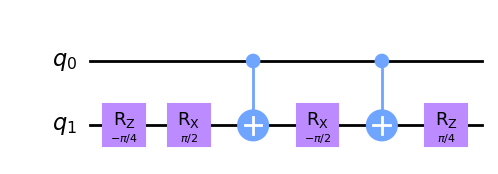

In [3]:
from qiskit import QuantumCircuit
import numpy as np

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply Rz(-π/4) to the target qubit (qubit 1)
qc.rz(-np.pi/4, 1)

# Apply Rx(π/2) to the target qubit
qc.rx(np.pi/2, 1)

# Apply CNOT with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Apply Rx(-π/2) to the target qubit
qc.rx(-np.pi/2, 1)

# Apply CNOT again with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Apply Rz(π/4) to the target qubit
qc.rz(np.pi/4, 1)

# Draw the circuit
qc.draw(output='mpl')

In [4]:
from qiskit import Aer, execute
from qiskit.quantum_info import Statevector

# Define your circuit 'qc' as before

# Use the statevector simulator
simulator = Aer.get_backend('statevector_simulator')

# Define a function to test the circuit on a specific input state
def test_controlled_s_gate(input_state):
    # Initialize the circuit with the input state
    test_circuit = QuantumCircuit(2)
    test_circuit.initialize(input_state, [0, 1])
    test_circuit.compose(qc, inplace=True)
    
    # Execute the circuit on the simulator
    result = execute(test_circuit, simulator).result()
    statevector = result.get_statevector()
    
    # Display the final statevector
    print(f"Input State: {input_state}")
    print(f"Output Statevector: {statevector}\n")

# Test the circuit on different basis states
test_controlled_s_gate([1, 0, 0, 0])  # |00⟩ state
test_controlled_s_gate([0, 1, 0, 0])  # |01⟩ state
test_controlled_s_gate([0, 0, 1, 0])  # |10⟩ state
test_controlled_s_gate([0, 0, 0, 1])  # |11⟩ state

Input State: [1, 0, 0, 0]
Output Statevector: Statevector([9.23879533e-01-3.82683432e-01j,
             0.00000000e+00+0.00000000e+00j,
             2.82856528e-17+1.17163010e-17j,
             0.00000000e+00+0.00000000e+00j],
            dims=(2, 2))

Input State: [0, 1, 0, 0]
Output Statevector: Statevector([0.00000000e+00+0.00000000e+00j,
             9.23879533e-01-3.82683432e-01j,
             0.00000000e+00+0.00000000e+00j,
             2.82856528e-17+1.17163010e-17j],
            dims=(2, 2))

Input State: [0, 0, 1, 0]
Output Statevector: Statevector([-3.00424186e-17+7.25288143e-17j,
              0.00000000e+00+0.00000000e+00j,
              9.23879533e-01-3.82683432e-01j,
              0.00000000e+00+0.00000000e+00j],
            dims=(2, 2))

Input State: [0, 0, 0, 1]
Output Statevector: Statevector([ 0.00000000e+00+0.00000000e+00j,
             -3.00424186e-17+7.25288143e-17j,
              0.00000000e+00+0.00000000e+00j,
              9.23879533e-01-3.82683432e-01j],
      